# Setup
## Import nesscary dependencies

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')


## Vectorize Data

In [36]:
tfidf_vectorizer = TfidfVectorizer()
train = pd.read_csv('train.csv')
X = tfidf_vectorizer.fit_transform(train['Text']).toarray()
y = [1 if i == 'tech' else 0 for i in train['Category']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 1

In [37]:
num_articles = train.shape[0]   # get rows
num_features = len(tfidf_vectorizer.get_feature_names_out())  # get the feature names
feature_df = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names_out())
feature_df = pd.concat([train['ArticleId'], feature_df], axis=1)  # concatenate dataframes


In [38]:
print("Number of articles:", num_articles)
print("Number of extracted features:", num_features)
print(feature_df.head()) # head prints out first 5

Number of articles: 428
Number of extracted features: 13518
   ArticleId   00       000  000th  001st  0051  007  0100  0130  028  ...  \
0       1976  0.0  0.020115    0.0    0.0   0.0  0.0   0.0   0.0  0.0  ...   
1       1797  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  ...   
2       1866  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  ...   
3       1153  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  ...   
4        342  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  ...   

   zola  zombie  zombies  zone  zonealarm  zones  zoom  zooms   zooropa  zorro  
0   0.0     0.0      0.0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0  
1   0.0     0.0      0.0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0  
2   0.0     0.0      0.0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0  
3   0.0     0.0      0.0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0  
4   0.0     0.0      0.0   0.0        0.0    0.0   0.0    0.0  0.0

Text(0.5, 0, 'Category')

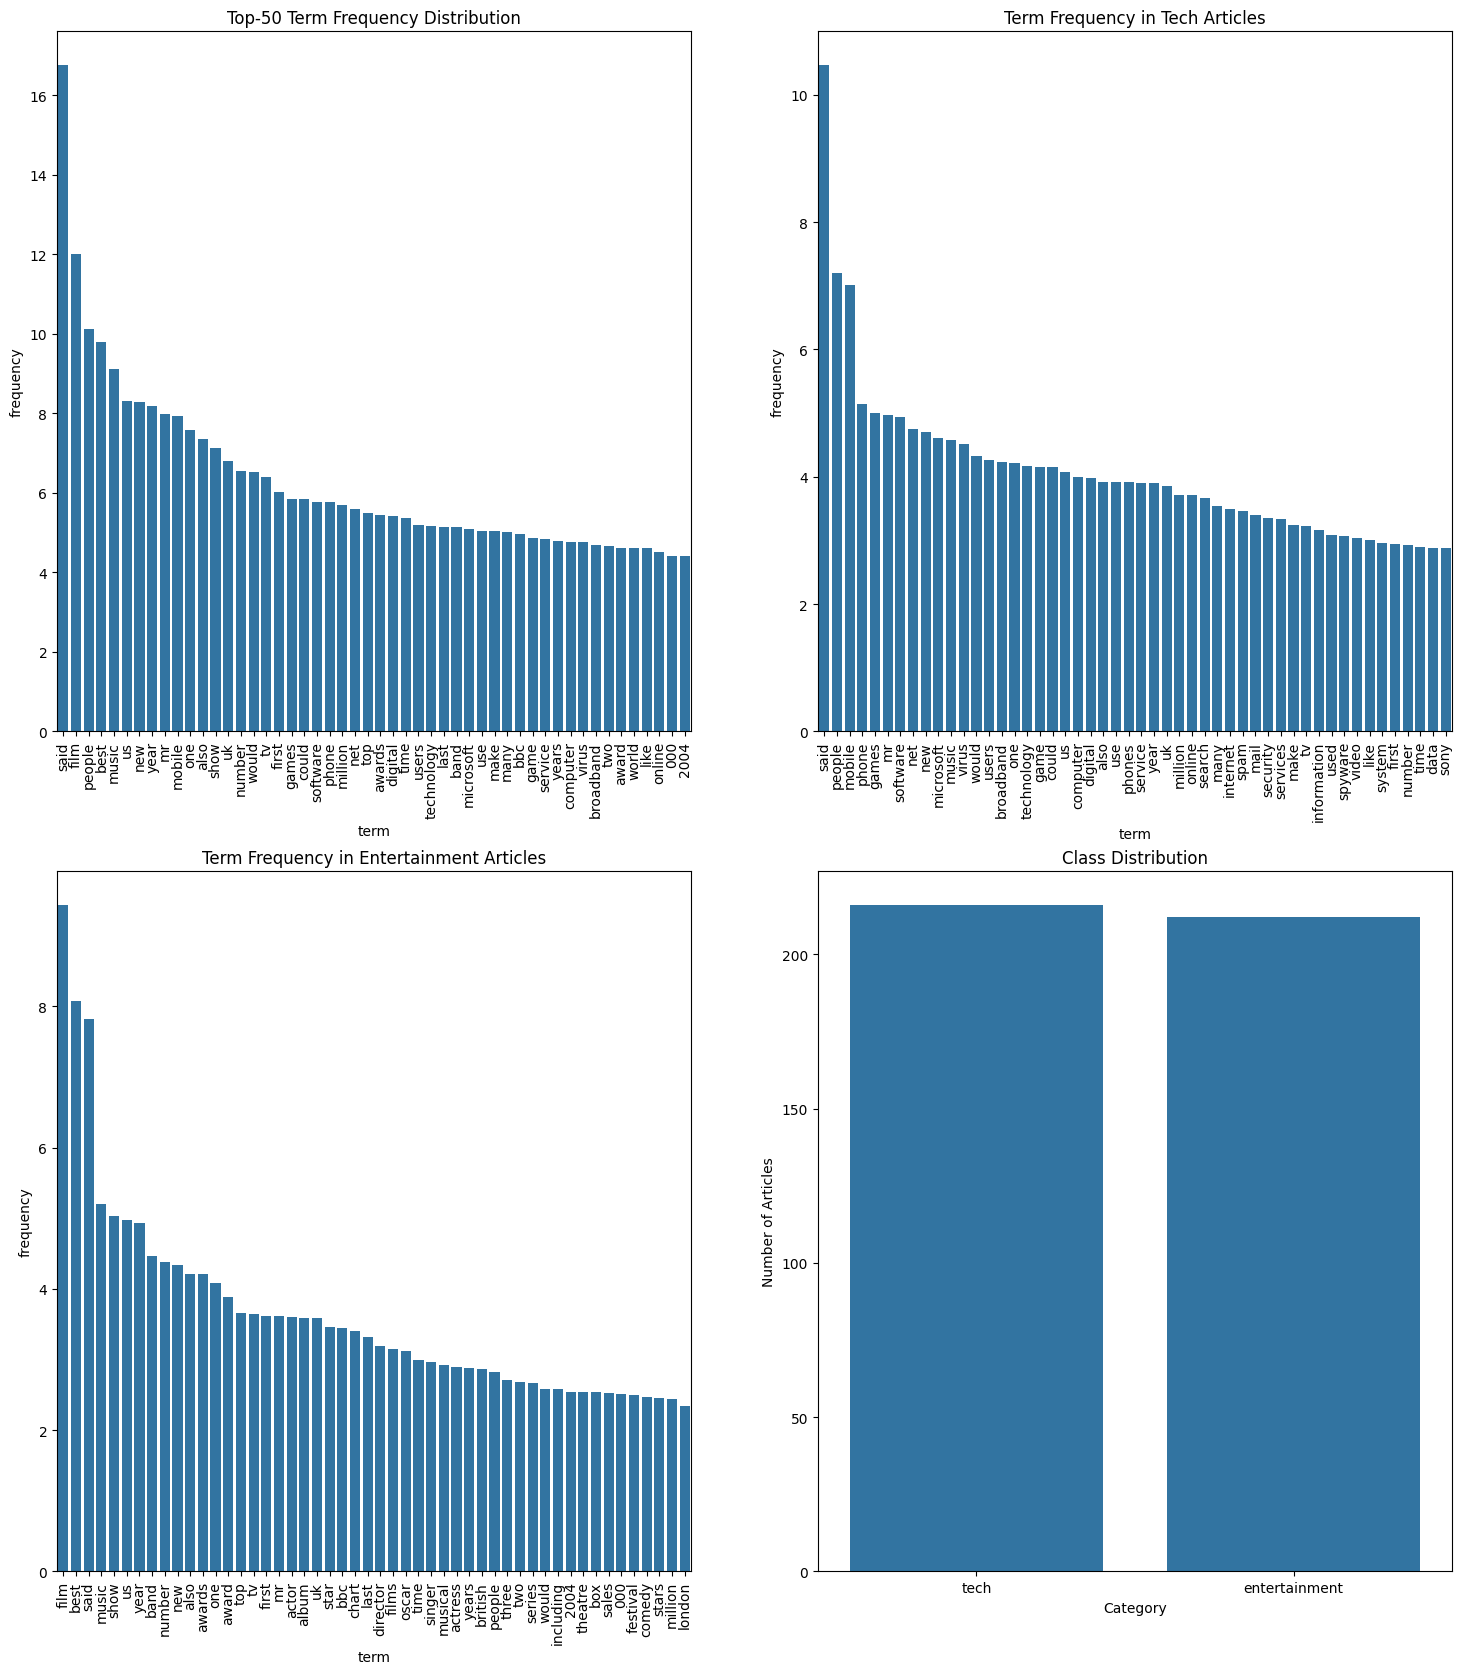

In [39]:
import matplotlib.pyplot as plt
term_freq = X.sum(axis=0)  # sum of term freq
terms = tfidf_vectorizer.get_feature_names_out()
term_freq_df = pd.DataFrame({'term': terms, 'frequency': term_freq})
top_50_terms = term_freq_df.nlargest(50, 'frequency')  # get top 50

plt.figure(figsize=(18, 20))  
plt.subplot(2, 2, 1)
sns.barplot(x='term', y='frequency', data=top_50_terms)
plt.xticks(rotation=90)
plt.title('Top-50 Term Frequency Distribution')

tech_text = train[train['Category'] == 'tech']['Text']
entertainment_text = train[train['Category'] == 'entertainment']['Text']
# calculate each category separately
tech_vectorizer = TfidfVectorizer()
tech_X = tech_vectorizer.fit_transform(tech_text)
tech_terms = tech_vectorizer.get_feature_names_out()
tech_term_freq = tech_X.toarray().sum(axis=0)
tech_term_freq_df = pd.DataFrame({'term': tech_terms, 'frequency': tech_term_freq})

entertainment_vectorizer = TfidfVectorizer()
entertainment_X = entertainment_vectorizer.fit_transform(entertainment_text)
entertainment_terms = entertainment_vectorizer.get_feature_names_out()
entertainment_term_freq = entertainment_X.toarray().sum(axis=0)
entertainment_term_freq_df = pd.DataFrame({'term': entertainment_terms, 'frequency': entertainment_term_freq})

plt.subplot(2, 2, 2)
sns.barplot(x='term', y='frequency', data=tech_term_freq_df.nlargest(50, 'frequency'))
plt.xticks(rotation=90)
plt.title('Term Frequency in Tech Articles')

plt.subplot(2, 2, 3)
sns.barplot(x='term', y='frequency', data=entertainment_term_freq_df.nlargest(50, 'frequency'))
plt.xticks(rotation=90)
plt.title('Term Frequency in Entertainment Articles')

class_counts = train['Category'].value_counts()
plt.subplot(2, 2, 4)
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.ylabel('Number of Articles')
plt.xlabel('Category')

# Task 2

## Task 2A

In [40]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

### Predict

In [41]:
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9767441860465116


### Top 20 most identifiable words

In [42]:
feature_names = tfidf_vectorizer.get_feature_names_out()
class_labels = ['entertainment', 'tech']
# get the log probabilities of each word for each class
log_prob = naive_bayes.feature_log_prob_
# dictionary to store the top 20 words
top_words_per_class = {}

for i, class_label in enumerate(class_labels):
    # sort the indices of the words by the log probabilty and reverse the list to be in descending order
    sorted_indices = np.argsort(log_prob[i])[::-1]
    # get the 20 most probablr words for the current class and add to the dictionary
    top_words_per_class[class_label] = [feature_names[index] for index in sorted_indices[:20]]

print("Top 20 most identifiable words for each class:")
for class_label, words in top_words_per_class.items():
    print(f"Class {class_label}:")
    print(words)

Top 20 most identifiable words for each class:
Class entertainment:
['film', 'best', 'said', 'band', 'show', 'music', 'year', 'awards', 'album', 'us', 'star', 'actor', 'top', 'award', 'number', 'tv', 'new', 'one', 'singer', 'oscar']
Class tech:
['said', 'mobile', 'people', 'games', 'software', 'microsoft', 'virus', 'phone', 'net', 'technology', 'mr', 'users', 'game', 'would', 'music', 'use', 'new', 'digital', 'search', 'could']


### Top 20 words that maximize quantity

In [43]:
# calculate P(X_w = 1|Y = y) / P(X_w = 1|Y ≠ y)
top_words = {}
for i, class_label in enumerate(class_labels):
    # P(X_w = 1|Y = y)
    prob_is_class = np.exp(log_prob[i])
    # P(X_w = 1|Y ≠ y)
    prob_not_class = np.exp(log_prob[1 - i])

    prob = prob_is_class / prob_not_class
    sorted_indices = np.argsort(prob)[::-1]
    top_words[class_label] = [feature_names[index] for index in sorted_indices[:20]]

In [44]:
print("Top 20 words that maximize quantity")
for class_label, words in top_words.items():
    print(f"Class {class_label}:")
    print(words)

Top 20 words that maximize quantity
Class entertainment:
['film', 'band', 'album', 'best', 'actor', 'singer', 'star', 'oscar', 'award', 'musical', 'chart', 'rock', 'theatre', 'comedy', 'stars', 'elvis', 'song', 'festival', 'awards', 'nominations']
Class tech:
['mobile', 'software', 'microsoft', 'games', 'virus', 'technology', 'users', 'net', 'phone', 'broadband', 'phones', 'spyware', 'computer', 'search', 'pc', 'firms', 'use', 'mail', 'data', 'game']


The second list of words describes each class better. This is because in the first list, there were words like 'could' 'mr' 'said' etc which have no real relation to the classes, whereas in the second list of words, the words are what are most likely to occur in the classes and therefore are much more related to the class and so describe them better. The second one looks at the ratio of words occurring in documents with class y, and documents that are not class y, in contrast to just looking at most occuring words in each document class. This is important as many documents may have similar occurrences of certain words, but certain other words may only occur in one document class, though not always be in the top 20 most occuring words.

## Task 2B

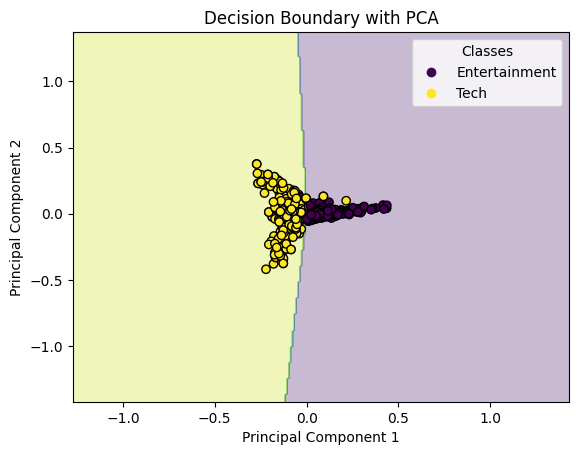

In [45]:
pca = PCA(n_components=2) # initialise pca
X_reduced = pca.fit_transform(X) # use pca on feature data
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    handles, _ = scatter.legend_elements()  # get legend elements
    custom_labels = ['Entertainment', 'Tech']  # custom labels so its not just 0 and 1 for legend
    plt.legend(handles, custom_labels, title="Classes")
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

optimal_knn_pca = KNeighborsClassifier(n_neighbors=8, metric='cosine')
optimal_knn_pca.fit(X_train_reduced, y_train)

plot_decision_boundary(optimal_knn_pca, X_reduced, y, title="Decision Boundary with PCA")

Using a euclidean distance for the decision boundary shows high bias toward tech and similar effects show for the minkowski distance

Using a manhattan distance for the decision boundary shows slight bias toward tech, specifically we can see a slight protruding circle where the purple data points meet the yellow data points.

Using cosine distance for the decision boundary shows a nice, smooth, separation for the two classes and no clear bias for either class.

The reason cosine distance shows a better decision boundary compared to euclidean, minkowski and manhattan is because cosine distance uses the angle between two vectors, whereas the other three use magnitude. Because there are so many dimensions, the other three distance metrics may suffer to the curse of dimensionality, where in high dimensions the distance between two points become similar, making it harder to distinguish between data points.

Using a higher k shows a smoother decision boundary and shows less bias to one class.

## Task 2C

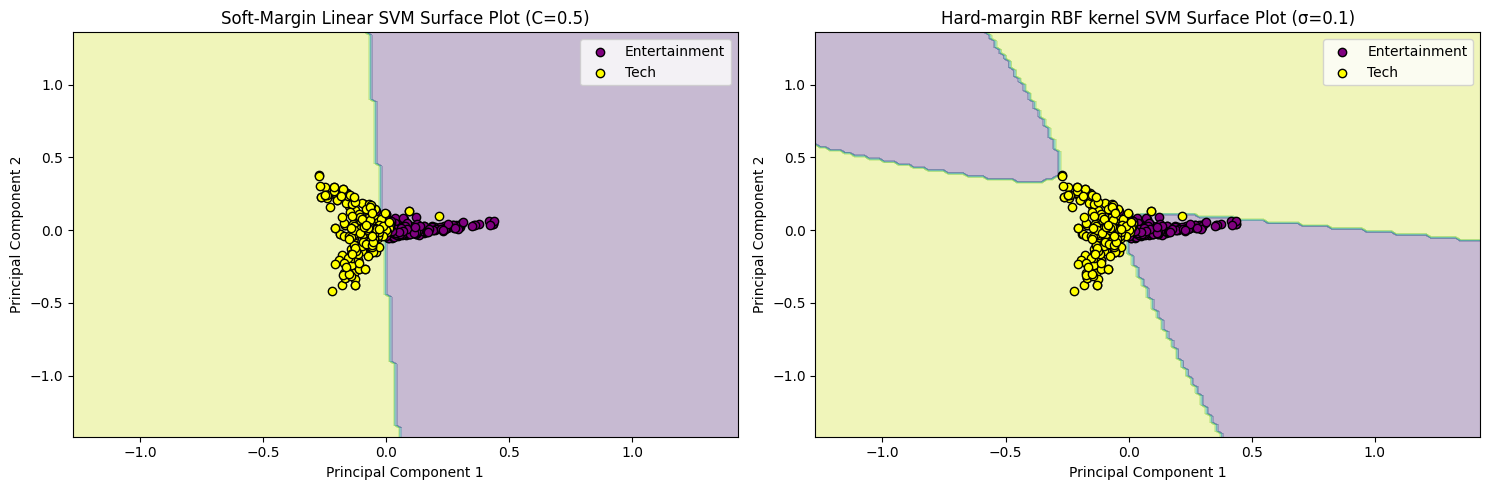

In [46]:
# PCA transformation
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_train_reduced = pca.transform(X_train)

# Function to visualize decision boundaries
def plot_decision_boundaries(classifiers, X, y, titles, figsize=(15, 5)):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    plt.figure(figsize=figsize)
    # Create the seperate plots for each classifier
    for idx, (clf, title) in enumerate(zip(classifiers, titles)):
        plt.subplot(1, len(classifiers), idx + 1)
        # Predict using the model
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Colour the plot by the different regions to show the boundary
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
        # Separate the points by class for the scatter plot
        for i, color, label in zip(np.unique(y), ['purple', 'yellow'], ['Entertainment', 'Tech']):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='k', marker='o', label=label)

        plt.title(title)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Define classifiers
linear_svm = SVC(kernel='linear', C=0.5)
linear_svm.fit(X_train_reduced, y_train)

rbf_svm = SVC(kernel='rbf', C=1e10, gamma=0.1)
rbf_svm.fit(X_train_reduced, y_train)

# List of classifiers and titles
classifiers = [linear_svm, rbf_svm]
titles = ["Soft-Margin Linear SVM Surface Plot (C=0.5)", 
          "Hard-margin RBF kernel SVM Surface Plot (σ=0.1)"]

# Plot decision boundaries
plot_decision_boundaries(classifiers, X_reduced, y, titles)


### Discussion
* The penalty parameter C in a soft-margin SVM controls how misclassifications are penalised. Using a low C value (C=0.5) allows for a wider margin and greater tolerance for misclassifications, making the model robust to outliers. In our plot, some tech class points are misclassified, but most points lie within their respective regions. Many points of both classes are near the support vectors, indicating a balanced margin. PCA reduction to 2-D space has caused some loss of resolution, making the decision boundary appear less clear and points seem closer or overlapping.

* The sigma value used in the RBF kernel SVM is used to control the kernel width in our hard-margin SVM. However, for our plots, we used the gamma, which is inversely related to sigma as shown by the equation γ=$\frac{1}{2σ^2​}$. Therefore, our sigma value ($\sqrt{5}$) used is relatively high, and this suggests that our kernel width is going to be less prone to overfitting and more isolated compared to a smaller sigma. This can be seen in our decision boundary, where no points are misclassified, and the boundary curves in a logarithmic shape over the entertainment class. 
  
* From the two plots, it seems that the hard-margin SVM performs better in classifying the examples as there are less misclassifications and can fully seperate the points via its boundary. 

## Task 2D

In [67]:
# Build a multi-layer perceptrons model with one layer, 1 perceptrons.
mlp_1 = MLPClassifier(hidden_layer_sizes=(1), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_1.fit(X_train, y_train)

# Performs predictions on the test set.
y_pred_1 = mlp_1.predict(X_test)

# Calculate test accuracy.
accuracy_1 = accuracy_score(y_test, y_pred_1)

# Display the results.
print(f'Accuracy mlp_1 (1 Hidden Layer, 1 Perceptrons) : {accuracy_1}')
print(f'Predicted Probabilities for the First 10 test examples:\n {mlp_1.predict_proba(X_test[0:10])}')
print(f'Prediction for the First 10 test examples: {mlp_1.predict(X_test[0:10])}')

# Build a multi-layer perceptrons model with one layer, 2 perceptrons.
mlp_2 = MLPClassifier(hidden_layer_sizes=(2), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_2.fit(X_train, y_train)

# Performs predictions on the test set.
y_pred_2 = mlp_2.predict(X_test)

# Calculate test accuracy.
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Displays the results.
print(f'Accuracy mlp_2 (1 Hidden Layer, 2 Perceptrons) : {accuracy_2}')
print(f'Predicted Probabilities for the First 10 test examples:\n {mlp_2.predict_proba(X_test[0:10])}')
print(f'Prediction for the First 10 test examples: {mlp_2.predict(X_test[0:10])}')

# Build a multi-layer perceptrons model with one layer, 5 perceptrons.
mlp_5 = MLPClassifier(hidden_layer_sizes=(5), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_5.fit(X_train, y_train)

# Performs predictions on the test set.
y_pred_5 = mlp_5.predict(X_test)

# Calculate test accuracy.
accuracy_5 = accuracy_score(y_test, y_pred_5)

# Displays the results.
print(f'Accuracy mlp_5 (1 Hidden Layer, 5 Perceptrons) : {accuracy_5}')
print(f'Predicted Probabilities for the First 10 test examples:\n {mlp_5.predict_proba(X_test[0:10])}')
print(f'Prediction for the First 10 test examples: {mlp_5.predict(X_test[0:10])}')

# Build a multi-layer perceptrons model with one layer, 20 perceptrons.
mlp_20 = MLPClassifier(hidden_layer_sizes=(20), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_20.fit(X_train, y_train)

# Performs predictions on the test set.
y_pred_20 = mlp_20.predict(X_test)

# Calculate test accuracy.
accuracy_20 = accuracy_score(y_test, y_pred_20)

# Displays the results.
print(f'Accuracy mlp_20 (1 Hidden Layer, 20 Perceptrons) : {accuracy_20}')
print(f'Predicted Probabilities for the First 10 test examples:\n {mlp_20.predict_proba(X_test[0:10])}')
print(f'Prediction for the First 10 test examples: {mlp_20.predict(X_test[0:10])}')

# Build a multi-layer perceptrons model with one layer, 40 perceptrons. 
mlp_40 = MLPClassifier(hidden_layer_sizes=(40), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_40.fit(X_train, y_train)

# Performs predictions on the test set.
y_pred_40 = mlp_40.predict(X_test)

# Calculate test accuracy.
accuracy_40 = accuracy_score(y_test, y_pred_40)

# Displays the results.
print(f'Accuracy mlp_40 (1 Hidden Layer, 40 Perceptrons) : {accuracy_40}')
print(f'Predicted Probabilities for the First 10 test examples:\n {mlp_40.predict_proba(X_test[0:10])}')
print(f'Prediction for the First 10 test examples: {mlp_40.predict(X_test[0:10])}')

Accuracy mlp_1 (1 Hidden Layer, 1 Perceptrons) : 0.8372093023255814
Predicted Probabilities for the First 10 test examples:
 [[0.94259295 0.05740705]
 [0.98866029 0.01133971]
 [0.34479479 0.65520521]
 [0.98646035 0.01353965]
 [0.97963883 0.02036117]
 [0.17961268 0.82038732]
 [0.64254036 0.35745964]
 [0.17961268 0.82038732]
 [0.62965941 0.37034059]
 [0.17961268 0.82038732]]
Prediction for the First 10 test examples: [0 0 1 0 0 1 0 1 0 1]
Accuracy mlp_2 (1 Hidden Layer, 2 Perceptrons) : 0.9883720930232558
Predicted Probabilities for the First 10 test examples:
 [[0.93225805 0.06774195]
 [0.96497358 0.03502642]
 [0.0208525  0.9791475 ]
 [0.98480802 0.01519198]
 [0.95516482 0.04483518]
 [0.00220262 0.99779738]
 [0.23544598 0.76455402]
 [0.00270926 0.99729074]
 [0.13563498 0.86436502]
 [0.00498644 0.99501356]]
Prediction for the First 10 test examples: [0 0 1 0 0 1 1 1 1 1]
Accuracy mlp_5 (1 Hidden Layer, 5 Perceptrons) : 0.9883720930232558
Predicted Probabilities for the First 10 test exam

We have built 5 multi-layers perceptrons classifiers. They all have one layer of hidden layer, but have different number of perceptrons in the hidden layer. The number of perceptrons are 1, 2, 5, 20, 40 respectively.

MLP with only 1 perceptron has the worst performance, there are two reasons for that. Firstly, it has a small number of perceptrons, so it could not fit the data well. Secondly, 100 epochs were not enough to complete the training, i.e. finding the optimized weighting.

For MLP classifiers with 2, 5, 20 and 40 perceptrons, their accuracies on the test set are the same (0.98837). However, that does not mean their performances are the same, since their accuracies are the same only for this particular test data. Therefore, we should not apply a occam's razor to claim that mlp_2 is the best model.

If compared a model with more perceptrons to a model with fewer perceptrons, we can see that, the model with more perceptrons would give a higher probablity for the correct label than a model with fewer perceptrons. For example, for the first example in the test data, mlp with 40 perceptrons would predict a "entertainment" label with a probability of 0.987. Whereas, a mlp with 2 perceptrons would predict the same label with a probability of 0.932.

Now, we will calculate the average cross entropy for each model, so that we could compare their perfomances.

### Calculationg Cross Entropy

The average cross entropy loss for MLP with 1 perceptron is 0.7776211218926512
The average cross entropy loss for MLP with 2 perceptron is 0.9433957929918688
The average cross entropy loss for MLP with 5 perceptron is 0.9488827760042903
The average cross entropy loss for MLP with 20 perceptron is 0.9677032734163499
The average cross entropy loss for MLP with 40 perceptron is 0.9755082133916665




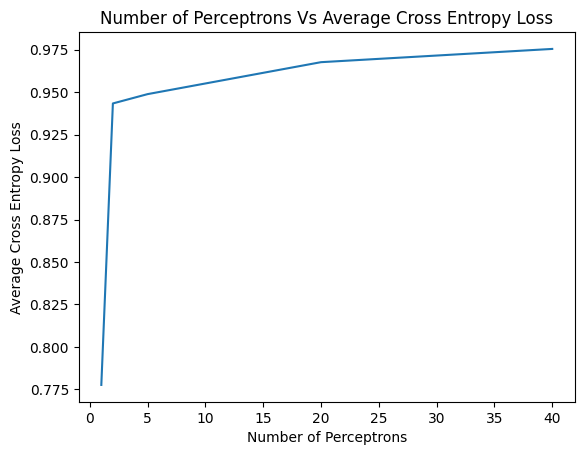

In [48]:
# Function for calculating average cross entropy
def get_average_cross_entropy(mlp, X_test, y_test):
    n = len(X_test)
    pred_probs = mlp.predict_proba(X_test)
    total_cross_entropy = 0
    for i in range(n):
        total_cross_entropy += pred_probs[i][y_test[i]]
    return total_cross_entropy / n

# Calculate the average cross entropy loss for each MLP.
mlp_1_cross_entropy_loss = get_average_cross_entropy(mlp_1, X_test, y_test)
mlp_2_cross_entropy_loss = get_average_cross_entropy(mlp_2, X_test, y_test)
mlp_5_cross_entropy_loss = get_average_cross_entropy(mlp_5, X_test, y_test)
mlp_20_cross_entropy_loss = get_average_cross_entropy(mlp_20, X_test, y_test)
mlp_40_cross_entropy_loss = get_average_cross_entropy(mlp_40, X_test, y_test)

print(f"The average cross entropy loss for MLP with 1 perceptron is {mlp_1_cross_entropy_loss}")
print(f"The average cross entropy loss for MLP with 2 perceptron is {mlp_2_cross_entropy_loss}")
print(f"The average cross entropy loss for MLP with 5 perceptron is {mlp_5_cross_entropy_loss}")
print(f"The average cross entropy loss for MLP with 20 perceptron is {mlp_20_cross_entropy_loss}")
print(f"The average cross entropy loss for MLP with 40 perceptron is {mlp_40_cross_entropy_loss}")
print("\n")

# Ploting the results.
plt.plot([1, 2, 5, 20, 40], 
         [mlp_1_cross_entropy_loss, mlp_2_cross_entropy_loss, mlp_5_cross_entropy_loss, mlp_20_cross_entropy_loss, mlp_40_cross_entropy_loss])
plt.xlabel('Number of Perceptrons')
plt.ylabel('Average Cross Entropy Loss')
plt.title('Number of Perceptrons Vs Average Cross Entropy Loss')
plt.show()

As number of perceptrons increases, the MLP will improve it performance in predicting new data, by giving a higher probability to the correct label. Hence, the average cross entropy would increase. The result from the above plot is as expected and matches our claim. 

When there is only one perceptron, the cross entropy is very low. This is because, not only did the model give a lower probability to the incorrect label than other models, it also gave an incorrect correct prediction. Incorrect predictions would reduce the cross entropy by a lot.

When there is two perceptrons, the cross entropy increased drastically compared to the model with only one perceptron. This is because, the model started being able to give more correct predictions, although the probabilities for the correct labels were not as high as other models with more perceptrons.

As the number of perceptrons increases, the cross entropy would also increase. But, the increasing rate would also slow down. For instance, when comparing the model with 20 perceptrons to the model with 40 perceptrons, even though there are 20 more perceptrons being added, the cross entropy did not increased by much. This is because, when the data could already be described well enough with certain number of perceptrons, adding more perceptrons would not help. An analogy would be, suppose we have a set of data which has a simple linear relationship, adding a square term or a cube term to the model would not further improve the model.

Also, note that the range of cross entropy is between 0 and 1.

# Task 3

## Task 3a

In [49]:
def train_classifiers(clf): 
    train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
    f1_scores_train_linear = []
    f1_scores_test_linear = []
    
    for size in train_sizes:
        X_partition = X[:int(size * len(X))]
        y_partition = y[:int(size * len(y))]
        X_train, X_test, y_train, y_test = train_test_split(X_partition, y_partition, test_size=0.2, random_state=1)
        # Train linear SVM
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        f1_scores_train_linear.append(f1_score(y_train, y_pred_train, average='weighted'))
        f1_scores_test_linear.append(f1_score(y_test, y_pred_test, average='weighted'))
    return f1_scores_train_linear, f1_scores_test_linear

classifiers = {
    "Naive bayes": MultinomialNB(alpha=0.1),
    "KNN" :KNeighborsClassifier(n_neighbors=16, metric="cosine"), 
    "SVM" :SVC(kernel='linear', C=0.5),    
    "MLP": MLPClassifier(hidden_layer_sizes=(40), learning_rate_init=0.01, max_iter=100, random_state=42)
}

scores = {}

for classifier in classifiers.keys():
    f1_scores_train_linear, f1_scores_test_linear = train_classifiers(classifiers[classifier])
    scores[classifier] = (f1_scores_train_linear, f1_scores_test_linear)
    

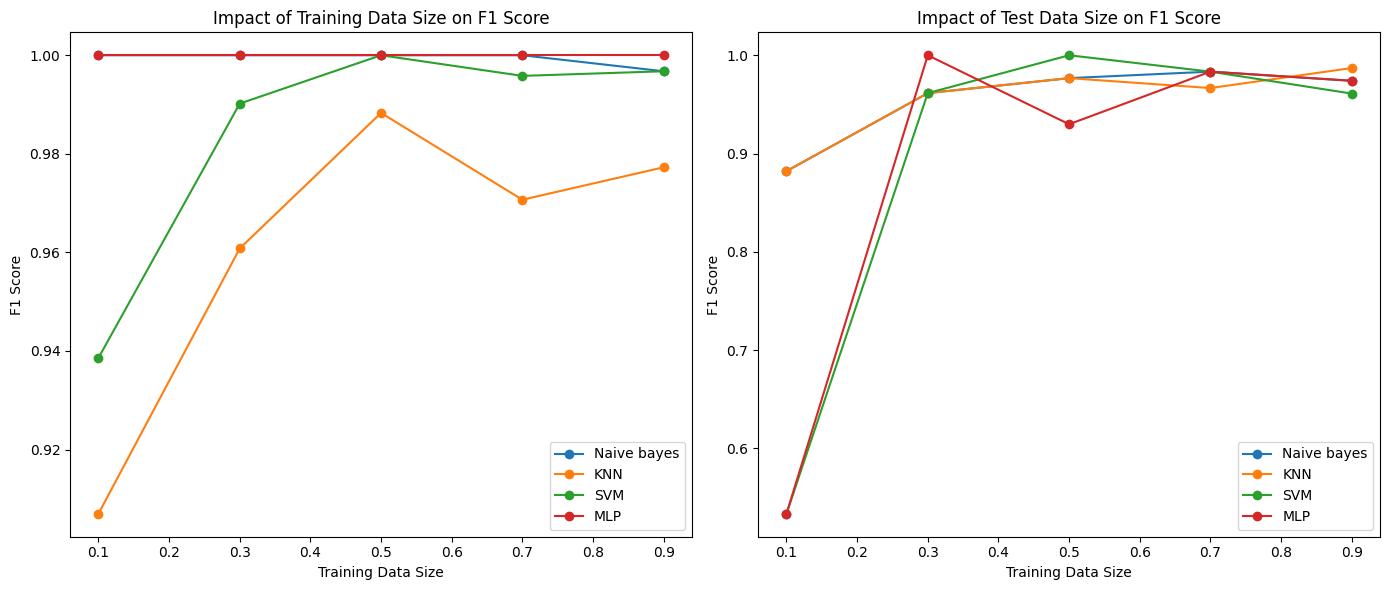

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot training scores
for classifier in scores.keys():
    training_scores = scores[classifier][0]
    axs[0].plot([0.1, 0.3, 0.5, 0.7, 0.9], training_scores, label=f'{classifier}', marker='o')

axs[0].set_xlabel('Training Data Size')
axs[0].set_ylabel('F1 Score')
axs[0].set_title('Impact of Training Data Size on F1 Score')
axs[0].legend()

# Plot testing scores
for classifier in scores.keys():
    testing_scores = scores[classifier][1]
    axs[1].plot([0.1, 0.3, 0.5, 0.7, 0.9], testing_scores, label=f'{classifier}', marker='o')

axs[1].set_xlabel('Training Data Size')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('Impact of Test Data Size on F1 Score')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

To create our plots, we partitioned the entire dataset into the first m-parts and then completed the train-test split before testing the accuracies of each classifier. For training F1 scores, we can see a relatively constant trend where both MLP and Naive Bayes had an accuracy of 100% across all sizes of M. Both SVM and KNN showed scores lower than 100% throughout most partitions. Both increased as the partition size increased from 10% to 50% of the dataset and then decreased slightly from sizes 70% to 90% of the training set. As for the test accuracy, we can see an increasing trend among all the classifiers. Most of the classifiers started with a low F1 score below 60%, but KNN managed to begin with 90%. All the classifiers converged around 98% - 99% on the final partition. Therefore, the curve on all the classifiers is logarithmic. Both KNN and MLP experienced F1 scores at 70% and 50% partitions, respectively. However, it is worth noting that these scores are based on the optimal model found during hyperparameter tuning in 3b. In the end, KNN scored the best, followed by MLP and NB, who tied in scores, followed by SVM. 

## Task 3b
#### Naive bayes HP tuning

In [51]:
nb = MultinomialNB()

f1_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
print(f"F1 Scores for each fold: {['{:.4f}'.format(score) for score in f1_scores]}")

F1 Scores for each fold: ['0.9565', '0.9855', '0.9853', '1.0000', '0.9853']


##### Testing Alpha (value added in LaPlace smoothing)

In [52]:
nb = MultinomialNB()

alphas = [0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0]

accuracies = {}

for alpha in alphas:
    # Set alpha for the model
    nb.alpha = alpha
    
    # Train the model
    nb.fit(X_train, y_train)
    
    # Predict the labels for the test set
    y_pred = nb.predict(X_test)
    
    # Calculate the accuracy and store it
    accuracy = (y_pred == y_test).mean()
    accuracies[alpha] = accuracy

print("Accuracies for each alpha value:")
for alpha, accuracy in accuracies.items():
    print(f"Alpha: {alpha}, Accuracy: {accuracy:.4f}")


Accuracies for each alpha value:
Alpha: 0.01, Accuracy: 0.9884
Alpha: 0.1, Accuracy: 0.9884
Alpha: 1.0, Accuracy: 0.9767
Alpha: 5.0, Accuracy: 0.9767
Alpha: 10.0, Accuracy: 0.9767
Alpha: 50.0, Accuracy: 0.9651
Alpha: 100.0, Accuracy: 0.8256


It seems the best choice is to use 0.1 for alpha

In [53]:
# You may need to re-read the data to get the proper scores
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform 5-fold CV and return F1 scores
def perform_cv(model, kf, X, y):
    return cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')


# Compute scores for naive bayes
for a in [0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0]:
    nb = MultinomialNB(alpha=a)
    nb_f1_scores = perform_cv(nb, kf, X, y)
    print(f"F1 Scores for Naive mayes with alpha = {a}: {np.mean(nb_f1_scores):.4f}")

F1 Scores for Naive mayes with alpha = 0.01: 0.9813
F1 Scores for Naive mayes with alpha = 0.1: 0.9837
F1 Scores for Naive mayes with alpha = 1.0: 0.9813
F1 Scores for Naive mayes with alpha = 5.0: 0.9743
F1 Scores for Naive mayes with alpha = 10.0: 0.9696
F1 Scores for Naive mayes with alpha = 50.0: 0.9079
F1 Scores for Naive mayes with alpha = 100.0: 0.8036


### KNN 

In [54]:
from sklearn.model_selection import cross_val_score

distances = ['euclidean', 'manhattan', 'minkowski', 'cosine']  # initialise distance metrics
accuracies = {}

for distance in distances:
    accuracies[distance] = []
    for i in range(1, 20):  # test for up to 20 neighbours
        knn = KNeighborsClassifier(n_neighbors=i, metric=distance)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5 fold CV
        accuracies[distance].append(np.mean(cv_scores))

print('Accuracy and k neighbours for euclidean, manhattan, minkowski and cosine')
print([max(x) for x in accuracies.values()])
print([np.argmax(x) + 1 for x in accuracies.values()])

Accuracy and k neighbours for euclidean, manhattan, minkowski and cosine
[0.9796248934356353, 0.9328218243819266, 0.9796248934356353, 0.9796248934356353]
[16, 11, 16, 16]


From the hyperparameter tuning it seems that the choice of distance metric doesn't matter except for manhattan (where we got the lowest accuracy of 0.622). 
We got the same accuracies for euclidean minkowski and cosine distance metrics with k = 16 but in terms of decision boundaries, cosine similarity had the best decision boundary.
Therefore the optimal hyperparameter settings is k=16, metric=cosine

In [55]:
# train on actual testing set
optimal_knn = KNeighborsClassifier(n_neighbors=16, metric='cosine')
optimal_knn.fit(X_train, y_train)
y_pred = optimal_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9767441860465116

### SVM

In [56]:
# You may need to re-read the data to get the proper scores
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform 5-fold CV and return F1 scores
def perform_cv(model, kf, X, y):
    return cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')


# Compute scores for Linear SVM
for c in [10, 1, 0.5, 0.1]:
    linear_svm = SVC(kernel='linear', C=c)
    linear_f1_scores = perform_cv(linear_svm, kf, X, y)
    print(f"F1 Scores for Linear SVM with c = {c}: {np.mean(linear_f1_scores):.4f}")

# Compute scores for rbf kernal SVM 
for g in [10, 1, 0.5, 0.1]:
    rbf_svm = SVC(kernel='rbf', C=1e10, gamma=g)
    rbf_f1_scores = perform_cv(rbf_svm, kf, X, y)
    print(f"F1 Scores for rbf SVM with gamma = {g}: {np.mean(rbf_f1_scores):.4f}")

F1 Scores for Linear SVM with c = 10: 0.9883
F1 Scores for Linear SVM with c = 1: 0.9883
F1 Scores for Linear SVM with c = 0.5: 0.9906
F1 Scores for Linear SVM with c = 0.1: 0.9223
F1 Scores for rbf SVM with gamma = 10: 0.5217
F1 Scores for rbf SVM with gamma = 1: 0.9836
F1 Scores for rbf SVM with gamma = 0.5: 0.9883
F1 Scores for rbf SVM with gamma = 0.1: 0.9883


For our 5 fold cross validation on the SVM model, we decided to use 3 hyperparameters: margin type (linear/rbf), miss classification penalty (C) and kernal width (sigma/gamma). 

* In our linear SVM, we are looking for the C, ranging from [10, 1, 0.5, 0.1], which results in the highest mean F1 score. From our results, the highest mean F1 score for the linear SVM was achieved with C = 0.5 and, which gave an F1 score of 0.9906. However, we noticed that the score increased from 0.9883 at ranges C=10, 1 and decreased to 0.9223 at range 0.1.

* In our kernel SVM, we are looking for the gamma ($\frac{1}{2σ^2​}$), ranging from [10, 1, 0.5, 0.1], which maximises the f1 score.  From our results, the highest mean F1 score was gamma = 0.5, which gave an F1 score of 0.9883. This score continued to increase from 10 (0.5217) to 1 (0.9836) but ultimately did not progress until gamma was significantly small. That is, a much larger sigma value than we currently have. Therefore, we will be sticking with our score of 0.1 and not exhaustively search the search space for a more optimal hyperparameter. 

* In the end, the linear SVM with C = 0.5 gives us the highest result and will be used in our comparisons for the remainder of the report. This value of C is allows us to have the wideest margins possible without losing too much accuracy when penalising misclassifications.  

### Multi-layers Perceptrons Classifiers

A multi-layers perceptron classifier has the following hyparameters, they are: number of hidden layers, number of perceptrons in each hidden layer, number of epochs and learning rate.

The more the hidden layers and perceptrons, the more flexible the model is when fitting to the data. But too much hidden layers and perceptrons would cause overfitting.

Number of epochs and learning rate would also affect whether the optimal weightings could be found. 

Under the condition where epochs are not constrained, if learning rate is too large, then the optimal weightings would not be accurate. If the learning rate is too small, it would take a lot of time to find the optimal weightings. 

However, it should be noted that, if learning rate is small but the number of epochs are limited, then, the optimal weightings might not be obtained before maximum number of epochs is reached.

Here, we will test the effect of hyperparameters on a MLP.

In [68]:
# This cross-validation function is made by Parin, which will be used to analysis the impact of hyperparameters of the Multi-layer perceptrons classifiers.
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform 5-fold CV and return F1 scores
# I made a little modification to the "perform_cv()" function created by Parin, such that it would return the average score. 
def get_average_cv(model, kf, X, y):
    return np.mean(cross_val_score(model, X, y, cv=kf, scoring='f1_weighted'))


# Effect of number of hidden layers onto MLP.
# We will build MLP with different number of hidden layers, number of perceptrons in each layer are kept constant.
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(5), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_2_layer = MLPClassifier(hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_3_layer = MLPClassifier(hidden_layer_sizes=(5, 5, 5), learning_rate_init=0.01, max_iter=100, random_state=42)

print(f"Cross validation score for MLP with 1 hidden layers: {get_average_cv(mlp_1_layer, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 2 hidden layers: {get_average_cv(mlp_2_layer, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 3 hidden layers: {get_average_cv(mlp_3_layer, kf, X_train, y_train)}")

Cross validation score for MLP with 1 hidden layers: 0.9796029023237096
Cross validation score for MLP with 2 hidden layers: 0.8399733725327317
Cross validation score for MLP with 3 hidden layers: 0.8300802272764912


In the above section where we tried to test the impact of number of hidden layers on the MLPs, the result was problematic. This is because we did not allow enough number of epochs for finding the optimal weightings, as a result, MLP with 1 hidden layer out performed MLPs with 2 or 3 hidden layers. This comparison was not fair, we shall allow enough epochs and compare them again in the next section.

In [58]:
# Effect of number of hidden layers onto MLP, with enough epochs.
# We will build MLP with different number of hidden layers, number of perceptrons in each layer are kept constant.
mlp_1_layer_1000_epochs = MLPClassifier(hidden_layer_sizes=(5), learning_rate_init=0.01, max_iter=1000, random_state=42)
mlp_2_layer_1000_epochs = MLPClassifier(hidden_layer_sizes=(5, 5), learning_rate_init=0.01, max_iter=1000, random_state=42)
mlp_3_layer_1000_epochs = MLPClassifier(hidden_layer_sizes=(5, 5, 5), learning_rate_init=0.01, max_iter=1000, random_state=42)

print(f"Cross validation score for MLP with 1 hidden layers: {get_average_cv(mlp_1_layer_1000_epochs, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 2 hidden layers: {get_average_cv(mlp_2_layer_1000_epochs, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 3 hidden layers: {get_average_cv(mlp_3_layer_1000_epochs, kf, X_train, y_train)}")

Cross validation score for MLP with 1 hidden layers: 0.9796029023237096
Cross validation score for MLP with 2 hidden layers: 0.9412931492793971
Cross validation score for MLP with 3 hidden layers: 0.8300802272764912


This time, we did not get a warning about optimal weightings or epochs. However, the results were still surprising. The more the hidden layers, the lower the test accuracy is.

This is because, as the number of hidden layers increases, the model starts to overfit to the train data, and the test accuracy decreases. It was still surprising because the number of perceptrons was small, and it only had 3 layers, I did not expected it would start overfitting. For comparasion, a model with a single hidden layer of 40 perceptrons did not overfit, but a model with 3 hidden layers, and 5 perceptrons per layer overfitted (15 perceptrons in total).

In [69]:
# Effect of number of perceptrons onto MLP
# We will build MLP with different number of perceptrons.
mlp_1_perceptrons = MLPClassifier(hidden_layer_sizes=(1), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_20_perceptrons = MLPClassifier(hidden_layer_sizes=(20), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_40_perceptrons = MLPClassifier(hidden_layer_sizes=(40), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_60_perceptrons = MLPClassifier(hidden_layer_sizes=(60), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_80_perceptrons = MLPClassifier(hidden_layer_sizes=(80), learning_rate_init=0.01, max_iter=100, random_state=42)
mlp_100_perceptrons = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.01, max_iter=100, random_state=42)

print(f"Cross validation score for MLP with 1 hidden layers, 1 perceptrons: {get_average_cv(mlp_1_perceptrons, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 1 hidden layers, 20 perceptrons: {get_average_cv(mlp_20_perceptrons, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 1 hidden layers, 40 perceptrons: {get_average_cv(mlp_40_perceptrons, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 1 hidden layers, 60 perceptrons: {get_average_cv(mlp_60_perceptrons, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 1 hidden layers, 80 perceptrons: {get_average_cv(mlp_80_perceptrons, kf, X_train, y_train)}")
print(f"Cross validation score for MLP with 1 hidden layers, 100 perceptrons: {get_average_cv(mlp_100_perceptrons, kf, X_train, y_train)}")

Cross validation score for MLP with 1 hidden layers, 1 perceptrons: 0.8714032298884709
Cross validation score for MLP with 1 hidden layers, 20 perceptrons: 0.9766610896479578
Cross validation score for MLP with 1 hidden layers, 40 perceptrons: 0.9795743119119841
Cross validation score for MLP with 1 hidden layers, 60 perceptrons: 0.9796029023237096
Cross validation score for MLP with 1 hidden layers, 80 perceptrons: 0.9766610896479578
Cross validation score for MLP with 1 hidden layers, 100 perceptrons: 0.9796029023237096


When the number of perceptrons increases from 1 to 20, there is a great increase in accuracy, but it does not increase much after the 20 perceptrons, because the data is already well fitted.
And after certain point, the model starts to overfit and decreases accuracy.

In [60]:
# Effect of learning rate onto MLP
# We will build MLP with different learning rate.
mlp_20_10_lr = MLPClassifier(hidden_layer_sizes=(20), learning_rate_init=10, max_iter=100, random_state=42)
mlp_20_1_lr = MLPClassifier(hidden_layer_sizes=(20), learning_rate_init=1, max_iter=100, random_state=42)
mlp_20_01_lr = MLPClassifier(hidden_layer_sizes=(20), learning_rate_init=0.1, max_iter=100, random_state=42)
mlp_20_001_lr = MLPClassifier(hidden_layer_sizes=(20), learning_rate_init=0.01, max_iter=100, random_state=42)

print(f"Cross validation score for MLP with learning rate of 10: {get_average_cv(mlp_20_10_lr , kf, X_train, y_train)}")
print(f"Cross validation score for MLP with learning rate of 1: {get_average_cv(mlp_20_1_lr , kf, X_train, y_train)}")
print(f"Cross validation score for MLP with learning rate of 0.1: {get_average_cv(mlp_20_01_lr , kf, X_train, y_train)}")
print(f"Cross validation score for MLP with learning rate of 0.01: {get_average_cv(mlp_20_001_lr , kf, X_train, y_train)}")

Cross validation score for MLP with learning rate of 10: 0.9679088087881837
Cross validation score for MLP with learning rate of 1: 0.9321281529742453
Cross validation score for MLP with learning rate of 0.1: 0.973807452786916
Cross validation score for MLP with learning rate of 0.01: 0.9766610896479578


When the learning rate is very large, the validation score is very low. This is because the weightings are not optimized.
When the learning rate increases to a optimum value, the score increases. This is because the weightings are optimized.
When the learning rate is too small, the validation score starts to drop, probably because due to weightings are being trapped in a local optimal values.

## 3C

In [65]:
def test_clf(name, clf_best, X, y, test_X, test_y): 
    # Train the classifier and generate predictions
    clf_best.fit(X, y)
    y_test_pred = clf_best.predict(test_X)
    # Calculate the accuracy and store it
    f1 = f1_score(test_y, y_test_pred)
    print(f"{name} F1 score: {f1:.4f}")

test = pd.read_csv('test.csv')
test_X = tfidf_vectorizer.transform(test['Text']).toarray()
test_y = [1 if i == 'tech' else 0 for i in test['Category']]

classifiers = {
    "NB": MultinomialNB(alpha=0.1),
    "KNN" :KNeighborsClassifier(n_neighbors=16, metric="cosine"), 
    "SVM" :SVC(kernel='linear', C=0.5),    
    "MLP": MLPClassifier(hidden_layer_sizes=(40), learning_rate_init=0.01, max_iter=100, random_state=42)
}

for classifier in classifiers.keys():
    test_clf(classifier, classifiers[classifier], X, y, test_X, test_y)

NB F1 score: 0.9677
KNN F1 score: 0.9670
SVM F1 score: 1.0000
MLP F1 score: 0.9783


For the last part of this report, we will look at how well our optimised models perform on the test data. To do this, we will be training on all the training datasets and then generating the predictions using the data from the test set to assess the performance of our optimised models using F1 scores. From this procedure, we can see that the SVM classifier scored the highest with a 1.0 F1 score. This is followed by the MLP classifier with a score of 0.9783 and then NB at 0.9677. Finally, KNN scored the lowest at 0.9677. These results are the inverse of what we got when comparing the F1 scores across different partitions where KNN scored the highest, and SVM scored the lowest. Therefore, some of the hyperparameters may be causing the models to be overfitted to the training data. However, these scores are still consistent with the overall performance trends observed during the training and testing phases. 